In [1]:
import aflare as ap
from lightkurve import KeplerTargetPixelFile
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

from testaflare import strPlot

%matplotlib inline

In [2]:
w359 = KeplerTargetPixelFile.from_archive(201885041, cadence='short')
lc359 = w359.to_lightcurve(aperture_mask=w359.pipeline_mask)
y = lc359.flux
x = lc359.time
flare1 = strPlot(lc359, 700, 850)
guessparams = flare1.guesspeaks()

fitparams = flare1.fit(guessparams)

Found 1 File(s)
INFO: Found cached file ./mastDownload/K2/ktwo201885041-c14_sc/ktwo201885041-c14_spd-targ.fits.gz with expected size 249928874. [astroquery.query]


In [3]:
from testaflare import getModel

In [4]:
fitparams.reshape(3,4)

array([[21.70775536, 12.76399419, 21.70776755,  8.03050324],
       [ 8.1558106 ,  8.1558106 ,  8.1558106 , -5.0726427 ],
       [ 9.45699438,  9.74473121,  8.75878031, -5.2279259 ]])

In [20]:
model = getModel(fitparams, [flare1.time, flare1.flux, 4])

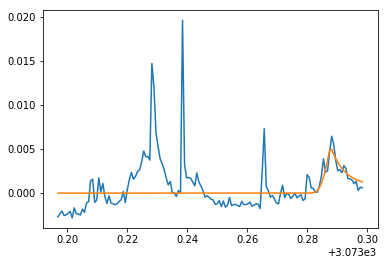

In [28]:
plt.plot(flare1.time, flare1.flux)
plt.plot(flare1.time, model.flatten())

In [13]:
model.shape

(1, 116466)